#  База данных образцов рукописного написания цифр MNIST
## Содержание
1. [Подключение библиотек и загрузка датасета](#Подключение-библиотек-и-загрузка-датасета)
2. [Описание датасета](#Описание-датасета)
3. [Задание №1](#Задание-№1)
    1. [Постановка задачи](#Постановка-задачи)
    2. [Проверка совпадения размерностей](#Проверка-совпадения-размерностей)
    3. [Проверка совпадения меток с реальными изображениями](#Проверка-совпадения-меток-с-реальными-изображениями)
    4. [Обучение модели](#Обучение-модели)
    5. [Прогнозы для тестового набора](#Прогнозы-для-тестового-набора)
    6. [Оценка точности модели](#Оценка-точности-модели)
    7. [Прогнозирование по созданным в paint картинкам](#Прогнозирование-по-созданным-в-paint-картинкам)

## Подключение библиотек и загрузка датасета

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib notebook

train_set_df = pd.read_csv('data/mnist_train.csv')
test_set_df = pd.read_csv('data/mnist_test.csv')

## Описание датасета

База данных MNIST — объёмная база данных образцов рукописного написания цифр. [Оригинальный датасет](http://yann.lecun.com/exdb/mnist/) имеет неудобный формат `.gz`, поэтому будем использовать преобразованный в `.csv` датасет. Скачать его можно [здесь](https://www.kaggle.com/oddrationale/mnist-in-csv) (требуется регистрация) или [здесь](https://drive.google.com/drive/folders/18sSDOlcoxG8witUyMRsB0mAuxPl4n5QQ?usp=sharing). Пример преобразования оригинального датасета в `.csv` можно найти [тут](https://pjreddie.com/projects/mnist-in-csv/).

Датасет состоит из двух файлов:
1. `mnist_train.csv` содержит 60 000 тренировочных примеров и меток. 
2. `mnist_test.csv` содержит 10 000 тестовых примеров и меток.

Каждая строка состоит из 785 значений: первый элемент строки - это метка (число от 0 до 9), а остальные 784 элемента - это значения пикселей (число от 0 до 255).

Тренировочный и тестовый сеты:

In [2]:
train_set_df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_set_df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Каждый сет разделим на признаки и метки, преобразуя для удобства в numpy массив:

In [4]:
train_x = train_set_df.loc[:, '1x1':].to_numpy()
train_y = train_set_df.loc[:, 'label'].to_numpy()

test_x = test_set_df.loc[:, '1x1':].to_numpy()
test_y = test_set_df.loc[:, 'label'].to_numpy()

# Задание №1
### Постановка задачи
Обучить методом k-ближайщих соседей MNIST датасет, предварительно проверив совпадение размерностей x_train и y_train, x_test и y_test, совпадение меток в y_train с реальными изображениями в x_train. Создать в paint несколько картинок и сделать по ним predict. Вычислить точность полученной модели.

### Проверка совпадения размерностей

In [5]:
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


### Проверка совпадения меток с реальными изображениями
Напишем функцию для вывода изображений из датасета:

In [6]:
def show_numbers(nrows, ncols, images, labels=None):
    plot_index = 1
    for i in range(nrows*ncols):
        plt.subplot(nrows, ncols, plot_index)
        img = images[i].reshape(28, 28)
        plt.imshow(img, cmap="gray")
        if labels is not None:
            plt.title(labels[i])
        plt.axis('off')
        plot_index += 1
    
    plt.tight_layout()

<IPython.core.display.Javascript object>


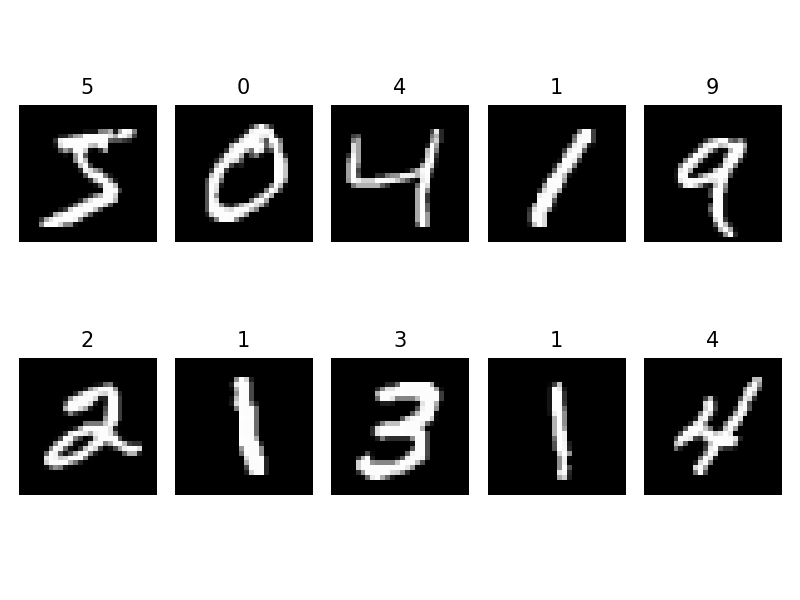

In [7]:
show_numbers(2, 5, train_x, train_y)

Инвертируем цвета и выведем изображения вновь:

In [8]:
train_x = abs(train_x - 255)
test_x = abs(test_x - 255)

<IPython.core.display.Javascript object>


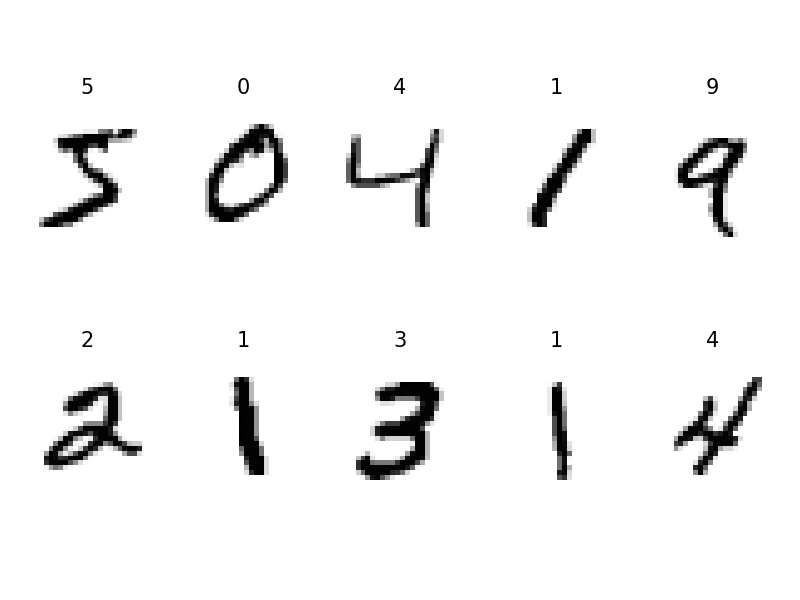

In [9]:
show_numbers(2, 5, train_x, train_y)

### Обучение модели

In [10]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=3)

### Прогнозы для тестового набора

In [11]:
y_pred = model.predict(test_x)

print(f"{test_y[:35]} -> Метки тестового набора")
print(f"{y_pred[:35]} -> Прогнозы для тестового набора")

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7] -> Метки тестового набора
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7] -> Прогнозы для тестового набора


### Оценка точности модели

In [12]:
from sklearn.metrics import precision_recall_fscore_support

print(f"Точность на тренировочных данных: {model.score(train_x, train_y)}")
print(f"Точность на тестовых данных: {model.score(test_x, test_y)}")

fscore = precision_recall_fscore_support(test_y, y_pred, average='macro')

print("\nДля тестового набора данных:\nprecision: {}\nrecall: {}\nfscore: {}\nsupport: {}".format(*fscore))

Точность на тренировочных данных: 0.9867166666666667
Точность на тестовых данных: 0.9705

Для тестового набора данных:
precision: 0.9709116052270813
recall: 0.9701144344783679
fscore: 0.9703749561556656
support: None


### Прогнозирование по созданным в paint картинкам

<IPython.core.display.Javascript object>


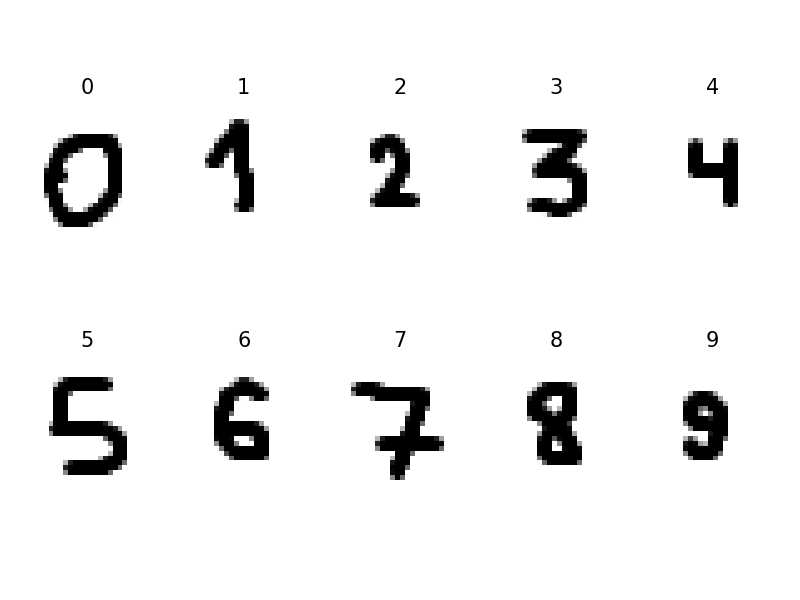

In [13]:
import os
from tensorflow.keras.preprocessing import image

images = []
for root, dirs, files in os.walk("predict"):
    for file in files:
        path = os.path.join(root, file)
        try:
            img = image.load_img(path, target_size=(28, 28), color_mode='grayscale')
            img = image.img_to_array(img).ravel()
            images.append(img)
        except:
            continue

y_pred = model.predict(images)

show_numbers(2, 5, images, y_pred)